<a href="https://colab.research.google.com/github/Ilyaas189/LAb_04-My-Recommender/blob/main/Lab_04_My_Recommender_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the dataset**

In [11]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("jester-data-1.csv",header = None)

**Dataset column information**

In [12]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [17]:
dataset.iloc[10809,49]

1.75

**Dataset shape**

In [3]:
dataset.shape

(24982, 101)

In [5]:
len(dataset.iloc[:,0].unique())

65

**Identify the empty column**
First column represents the number of the jokes as this is not the rating So we drop that column

In [6]:
dataset.drop(labels = dataset.columns[0],axis = 1,inplace = True)

**To get the best and worst rated dataframe**

In [7]:
best_rated = dataset.T[dataset.describe().T['75%'] > 1].T
worst_rated = dataset.T[dataset.describe().T['75%'] < 1].T

In [13]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
count,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,...,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.00000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000
mean,72.467478,34.401435,27.094089,33.263717,36.244936,0.427236,19.342119,-0.401803,-0.616110,36.228421,19.520763,14.107285,11.445280,-1.754815,11.038325,-1.682015,-3.072122,-1.103119,-0.619151,0.174010,-0.921997,2.336112,14.812794,19.702896,35.003861,16.831144,6.108754,3.492787,5.393417,3.160797,27.448552,3.465963,3.290261,31.892051,14.294251,3.125464,3.381442,31.184107,9.610589,8.527044,...,3.147019,3.156669,19.295580,30.078602,3.261098,2.773196,29.075706,2.804985,2.818099,19.205059,64.955502,65.511747,65.230747,63.738037,64.060745,64.784238,63.813772,63.885116,63.075803,63.645943,63.130073,63.174054,62.956359,62.417244,62.222051,61.607885,62.263703,61.753387,62.469264,60.689216,61.462019,60.27989,60.421701,59.059621,58.749897,58.541104,58.017246,57.061650,55.753357,60.138090
std,21.859600,46.707059,44.228006,46.747535,48.812967,5.472657,37.860770,5.741616,5.008894,48.228364,38.329975,32.641415,29.938683,5.155992,29.526365,5.355089,5.281486,4.532969,5.039152,5.083095,5.216848,6.856606,34.587240,39.682897,48.637167,37.051743,21.688893,7.074558,19.659326,6.401350,44.864605,12.037673,5.717119,47.440118,34.057662,5.703922,4.991137,47.176688,27.673845,26.397293,...,9.383020,6.160750,39.238572,46.233500,10.976394,6.659336,45.963476,6.105714,6.822990,38.955997,47.396153,45.921201,46.644798,48.075806,47.520009,46.243016,47.220253,46.804611,47.675717,47.133626,47.002169,47.332326,46.966353,47.621754,47.593983,47.967071,47.183236,47.224021,46.479714,48.088127,47.335405,47.94644,47.359847,48.196204,48.310728,48.130562,48.164681,48.717455,49.237139,47.913531
min,36.000000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.95000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,53.000000,-0.150000,-2.180000,-1.145000,-3.350000,-3.690000,-0.390000,-5.290000,-4.610000,-1.775000,-0.830000,-0.530000,-1.020000,-6.260000,-1.410000,-6.210000,-7.430000,-4.420000,-4.420000,-3.450000,-5.050000,-0.730000,-1.840000,-2.480000,-3.690000,-2.280000,-1.500000,0.730000,-1.410000,0.340000,-2.380000,-0.580000,0.680000,-3

In [9]:
dataset.describe().

['-7.52.1']

**Defining the function to replace the percentage of original values**

In [14]:
arr = dataset.values[:100]
def replace(orig, percentage=0.1):
    """
    Replaces 'percentage'% of the original values in 'orig' with 99's
    :param orig: original data array
    :param percentage: percentage of values to replace (0<percentage<1)
    """
    new_data = orig.copy()
    rated = np.where(arr!=99)
    n_rated = len(rated[0])
    idx = np.random.choice(n_rated, size=int(percentage*n_rated))
    new_data[rated[0][idx], rated[1][idx]] = 99
    return new_data, (rated[0][idx], rated[1][idx])

**To save the new generated array**

In [15]:
validation_set, idx = replace(dataset.values,0.1)

In [ ]:
validation_set

array([[ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
       [99.  ,  8.35, 99.  , ..., 99.  , 99.  , 99.  ],
       ...,
       [-8.01, -9.37, -2.43, ..., -7.77,  1.21, -5.39],
       [ 6.5 , -1.89, -5.87, ..., 99.  , 99.  , 99.  ],
       [-6.8 ,  4.61,  8.3 , ...,   nan,   nan,   nan]])

**Latent Factor Modeling**

In [16]:
user_ratings = dataset.values
n_latent_factors = 2
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [ ]:
latent_user_preferences

array([[0.65963588, 0.87257483],
       [0.63200608, 0.73028454],
       [0.62632513, 0.30185635],
       ...,
       [0.46730859, 0.69576551],
       [0.39675089, 0.34952692],
       [0.70415741, 0.77464778]])

In [ ]:
latent_item_features

array([[0.29472391, 0.44864471],
       [0.49785522, 0.42087509],
       [0.42107361, 0.00560596],
       [0.37769677, 0.29233191],
       [0.27496859, 0.85141485],
       [0.64769193, 0.43580732],
       [0.01288097, 0.49044924],
       [0.31423303, 0.54712944],
       [0.20256706, 0.07686763],
       [0.90145789, 0.08324203],
       [0.69297199, 0.27451361],
       [0.03184952, 0.82889971],
       [0.09726286, 0.01310378],
       [0.94471708, 0.50097649],
       [0.41014545, 0.00299421],
       [0.96938052, 0.12243819],
       [0.83126239, 0.47443629],
       [0.4014337 , 0.4898475 ],
       [0.14719088, 0.20983497],
       [0.9025795 , 0.89685563],
       [0.99004314, 0.00999185],
       [0.2529546 , 0.71099184],
       [0.1701019 , 0.07690391],
       [0.40808022, 0.91245277],
       [0.91088194, 0.72050408],
       [0.93564586, 0.10542274],
       [0.64387931, 0.33804515],
       [0.91637867, 0.63511286],
       [0.10351403, 0.97252431],
       [0.28504361, 0.09272221],
       [0.

**Functions of the latent module implementation**

In [ ]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error ,dtype=np.float64) ** 2).mean()
        print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
        mse_history.append(mse)
    return mse_history

**Calculate it over 10 iterations for first 10 instances**

Becuse of the memory flow error I have calculated the mse on 10 iterations of the data

In [ ]:
num_iter = 10
hist = sgd(num_iter)

Iteration 0/10:	MSE=928.084536
Iteration 1/10:	MSE=638.335898
Iteration 2/10:	MSE=600.769943
Iteration 3/10:	MSE=576.137875
Iteration 4/10:	MSE=489.093429
Iteration 5/10:	MSE=443.892665
Iteration 6/10:	MSE=437.849311
Iteration 7/10:	MSE=438.918993
Iteration 8/10:	MSE=440.630763
Iteration 9/10:	MSE=441.650526


**Displaying the MSE rate graphically**

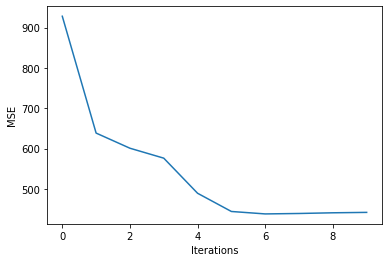

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(0, num_iter), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [ ]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[ 4.54132109e+00,  4.48374657e+00,  4.74550340e+00, ...,
         8.50211611e-02,  8.44192789e-02,  3.71951316e-01],
       [ 1.00754271e+02,  8.93531313e+01,  1.00905905e+02, ...,
         9.66741211e+01,  9.57000713e+01,  1.03713126e+02],
       [ 1.09090228e+02,  9.76046964e+01,  1.09625863e+02, ...,
         9.66308368e+01,  9.56577026e+01,  1.04195109e+02],
       ...,
       [-6.92558135e+00, -6.70423927e+00, -7.17920837e+00, ...,
        -1.37997900e+00, -1.36638884e+00, -1.82643090e+00],
       [ 1.36333390e+01,  3.75284847e+00,  1.00479020e+01, ...,
         9.11468307e+01,  9.02238168e+01,  9.26536841e+01],
       [ 8.40201827e+00,  2.70089568e+00,  6.36020359e+00, ...,
         5.25389184e+01,  5.20069052e+01,  5.34417658e+01]])

In [ ]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = dataset.columns

In [ ]:
comparison_data

,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,-8.5.1,-6.75,-7.18,8.45,-7.18.1,-7.52.1,-7.43,-9.81,-9.85.1,-9.85.2,-9.37,1.5,-4.37,-9.81.1,-8.5.2,1.12,7.82,2.86,9.13,-7.43.1,2.14,-4.08,-9.08,7.82.1,5.05,4.95,-9.17,-8.4,-8.4.1,-8.4.2,...,8.59,3.59,-6.84,-9.03.1,2.82.1,-1.36,-9.08.2,8.3.1,5.68,-4.81,99,99.1,99.2,99.3,99.4,99.5,99.6,-9.42.1,99.7,99.8,99.9,-7.72,99.10,99.11,99.12,99.13,99.14,99.15,99.16,99.17,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,"(4.08, 4.5413210892612215)","(-0.29, 4.483746566234588)","(6.36, 4.74550339645935)","(4.37, 4.567252929026535)","(-2.38, 0.0319569200102882)","(-9.66, 3.546706802331338)","(-0.73, 0.020102640832568967)","(-5.34, 0.001589822955124248)","(8.88, 4.60396449228017)","(9.22, 3.7133212083759974)","(6.75, 2.612623994144517)","(8.64, 2.228192620075139)","(4.42, 0.019820065467803558)","(7.43, 2.216956381472079)","(4.56, 0.011180208060871154)","(-0.97, 0.02926400847480671)","(4.66, 0.016022726689138032)","(-0.68, 0.017783803621309425)","(3.3, 0.023454691857928988)","(-1.21, 0.011658857927924225)","(0.87, 0.0616208499490892)","(8.64, 3.0457030815653)","(8.35, 4.004327074834298)","(9.17, 4.444896061670315)","(0.05, 3.604527374045927)","(7.57, 1.079071714121187)","(4.71, 0.06841110114644311)","(0.87, 0.7741933140206329)","(-0.39, 0.05510113316640933)","(6.99, 4.6639918252191155)","(6.5, 0.32024342850088283)","(-0.92, 0.027213058894710464)","(7.14, 4.723758239789693)","(9.03, 2.8456850105907936)","(-1.8, 0.04431514710042467)","(0.73, 0.021668584877733186)","(7.09, 4.3574972920887465)","(3.4, 1.8062890104413964)","(-0.87, 1.7338966599124195)","(7.91, 2.2529452118766082)",...,"(-6.7, 0.15359928806098774)","(-3.35, 0.0305658506717488)","(-9.03, 3.9649722171853408)","(4.47, 4.686747289098833)","(4.08, 0.22918485459988244)","(-3.83, 0.04887974484133208)","(8.74, 4.736070707733069)","(1.12, 0.025229101368337538)","(0.78, 0.05800750927211552)","(7.52, 3.908811593384503)","(-5.0, 0.014464502605918932)","(2.77, 0.03045083213030714)","(8.3, 0.03073710973581262)","(7.77, 0.08832363992745927)","(7.33, 0.13835805115551303)","(6.21, 0.19815634732611676)","(7.72, 0.18455000902252439)","(8.98, 0.2044107483237152)","(8.64, 0.2336347448911186)","(8.2, 0.38113754852507276)","(3.93, 0.348528197539953)","(4.85, 0.37939247780074414)","(4.85, 0.38456980949737435)","(6.07, 0.4283568375328673)","(8.98, 0.3539412529514086)","(4.51, 0.3204326900246219)","(-0.05, 0.34138279513233105)","(3.69, 0.27072326660093515)","(4.56, 0.2980604874077276)","(0.58, 0.24439234624726539)","(2.82, 0.2089438534008976)","(-4.95, 0.22477231256898497)","(-0.29, 0.1884622470809097)","(7.86, 0.0561994908664425)","(-0.19, 0.04259377474316358)","(-2.14, 0.010958001737262107)","(3.06, 0.013723307239980892)","(0.34, 0.08502116112497396)","(-4.32, 0.08441927893955489)","(1.07, 0.3719513156565718)"
1,"(99.0, 100.75427115848645)","(99.0, 89.35313133103602)","(99.0, 100.90590519720547)","(99.0, 105.58140054329415)","(9.03, 0.7675879655714126)","(9.27, 64.20558050195972)","(9.03, -0.41740781128271015)","(9.27, -0.9098450999109009)","(99.0, 105.20922353754804)","(99.0, 67.14840671215215)","(7.33, 47.54989552853046)","(7.57, 38.63033539565407)","(9.37, -1.6535462766771982)","(6.17, 38.230582108165756)","(-6.36, -1.7766682341806341)","(-6.89, -2.834500557049828)","(-7.86, -0.8878681212398878)","(9.03, -0.46461731282128127)","(9.03, 0.5550424571766898)","(9.03, -0.5447697872950018)","(7.28, 2.920015663520645)","(99.0, 52.35445947937257)","(8.25, 71.86401926802628)","(99.0, 102.76350750972007)","(99.0, 62.5726914758231)","(7.48, 19.631270408391373)","(7.28, 4.439455440493053)","(7.28, 14.998803258373037)","(8.93, 3.8483756861827336)","(99.0, 90.56743097610457)","(6.17, 7.729559471502569)","(7.28, 3.792209364574917)","(99.0, 100.08380436944469)","(99.0, 49.7529481594955)","(8.98, 3.7529597609448633)","(7.33, 3.6759882709543756)","(99.0, 95.94884631855685)","(6.17, 31.221187472236902)","(9.08, 29.114184693457272)","(7.33, 38.56948278